# Time Series
### Author: Shuo Xu

#### Import packages

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#### Import data

In [2]:
df_bridge = pd.read_csv('bridge.csv')
df_claims = pd.read_csv('dim_claims.csv')
df_date = pd.read_csv('dim_date.csv')
df_pa = pd.read_csv('dim_pa.csv')

In [3]:
df_bridge.head()

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1


In [4]:
df_bridge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dim_claim_id  1335576 non-null  int64  
 1   dim_pa_id     555951 non-null   float64
 2   dim_date_id   1335576 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 MB


In [5]:
df_claims.head()

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.0,0
1,2,999001,A,NaN,1
2,3,417740,A,76.0,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1


In [6]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335576 entries, 0 to 1335575
Data columns (total 5 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   dim_claim_id             1335576 non-null  int64  
 1   bin                      1335576 non-null  int64  
 2   drug                     1335576 non-null  object 
 3   reject_code              555951 non-null   float64
 4   pharmacy_claim_approved  1335576 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ MB


In [7]:
df_pa.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1


In [8]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555951 entries, 0 to 555950
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   dim_pa_id          555951 non-null  int64
 1   correct_diagnosis  555951 non-null  int64
 2   tried_and_failed   555951 non-null  int64
 3   contraindication   555951 non-null  int64
 4   pa_approved        555951 non-null  int64
dtypes: int64(5)
memory usage: 21.2 MB


In [9]:
df_date.head()

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0


In [20]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dim_date_id     1520 non-null   int64 
 1   date_val        1520 non-null   object
 2   calendar_year   1520 non-null   int64 
 3   calendar_month  1520 non-null   int64 
 4   calendar_day    1520 non-null   int64 
 5   day_of_week     1520 non-null   int64 
 6   is_weekday      1520 non-null   int64 
 7   is_workday      1520 non-null   int64 
 8   is_holiday      1520 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 107.0+ KB


In [337]:
#merge tables
dim = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
dim = pd.merge(dim, df_date, how="left", on=["dim_date_id"])
dim = pd.merge(df_pa,dim,how="left", on=["dim_pa_id"])
dim.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1,1,0,1,1,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,1,0,0,1,3,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
2,3,0,0,1,1,10,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,1,1,0,1,11,1,999001,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
4,5,0,1,0,1,15,1,417614,A,70.0,0,2017-01-01,2017,1,1,1,0,0,1


#### Time Series of Claims

In [44]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])
df_claims_ts = pd.merge(result1, df_date, how = "inner", on = ["dim_date_id"])

In [45]:
df_claims_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1


In [46]:
df_claims_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\Claims_Time_Series.csv', index = False)

#### Time Series of PA

In [47]:
result2 = pd.merge(df_bridge, df_pa, how="inner", on=["dim_pa_id"])
df_pa_ts = pd.merge(result2, df_date, how = "inner", on = ["dim_date_id"])

In [48]:
df_pa_ts.head()

,dim_claim_id,dim_pa_id,dim_date_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,1.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
1,3,2.0,1,1,0,0,1,2017-01-01,2017,1,1,1,0,0,1
2,10,3.0,1,0,0,1,1,2017-01-01,2017,1,1,1,0,0,1
3,11,4.0,1,1,1,0,1,2017-01-01,2017,1,1,1,0,0,1
4,15,5.0,1,0,1,0,1,2017-01-01,2017,1,1,1,0,0,1


In [49]:
df_pa_ts.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\PA_Time_Series.csv', index = False)

#### Time Series of All

In [50]:
df = pd.merge(df_claims_ts, df_pa, how = "left", on = ["dim_pa_id"])

In [51]:
df.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1.0,1,417380,A,75.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,1.0,0.0,1.0
1,2,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
2,3,2.0,1,417740,A,76.0,0,2017-01-01,2017,1,1,1,0,0,1,1.0,0.0,0.0,1.0
3,4,NaN,1,999001,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
4,5,NaN,1,417740,A,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN


In [52]:
df.to_csv(r'C:\Users\xushu\Downloads\CoverMyMeds_data-20210503T170046Z-001\CoverMyMeds_data\All_Time_Series.csv', index = False)

#### Get the list of companies

In [55]:
Companies = []
for i in range(len(df.bin.unique())):
    Companies.append(str(df.bin.unique()[i]))
Companies

['417380', '999001', '417740', '417614']

#### Get the list of Drugs

In [56]:
Drugs = []
for i in range(len(df.drug.unique())):
    Drugs.append(df.drug.unique()[i])
Drugs

['A', 'B', 'C']

#### Get the list of Rejection Codes.

In [57]:
Rej_Codes = []
for i in range(len(df.reject_code.unique())):
    Rej_Codes.append(df.reject_code.unique()[i])
Rej_Codes = list(filter(lambda x: str(x) != 'nan', Rej_Codes))
Rej_Codes

[75.0, 76.0, 70.0]

#### Get the Years

In [58]:
Years = []
for i in range(len(df.calendar_year.unique())):
    Years.append(df.calendar_year.unique()[i])
Years

[2017, 2018, 2019]

#### Graph the claim approval rates for each drug.

In [59]:
App_Rate_Drugs = []
for i in range(len(Drugs)):
    app = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].sum()
    tot = df[(df.drug==Drugs[i])]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Drugs.append(rate)
App_Rate_Drugs

[0.58, 0.55, 0.64]

#### Graph the approval rates for each insurance company.

In [61]:
App_Rate_Companies = []
for i in range(len(Companies)):
    app = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].sum()
    tot = df[(df.bin==int(Companies[i]))]['pharmacy_claim_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Companies.append(rate)
App_Rate_Companies

[0.23, 0.9, 0.46, 0.21]

#### Get the pa approval rates for each diagnosis status.

#### Get the list of diagnosis status.

In [63]:
Diag_Statuses = []
for i in range(len(df.correct_diagnosis.unique())):
    Diag_Statuses.append(str(df.correct_diagnosis.unique()[i]))
Diag_Statuses = list(filter(lambda x: str(x) != 'nan', Diag_Statuses))
Diag_Statuses

['1.0', '0.0']

In [64]:
App_Rate_Diags = []
for i in range(len(Diag_Statuses)):
    app = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].sum()
    tot = df[(df.correct_diagnosis==float(Diag_Statuses[i]))]['pa_approved'].count()
    rate = round(app/tot,2)
    App_Rate_Diags.append(rate)
App_Rate_Diags

[0.74, 0.7]

#### Get the pa approval rate for each tried_and_failed status.

#### Get the list of tried and failed status.

In [66]:
TF_Statuses = []
for i in range(len(df.tried_and_failed.unique())):
    TF_Statuses.append(str(df.tried_and_failed.unique()[i]))
TF_Statuses = list(filter(lambda x: str(x) != 'nan', TF_Statuses))
TF_Statuses

['1.0', '0.0']

In [67]:
test = df_pa.groupby('tried_and_failed')["pa_approved"].sum()/df_pa.tried_and_failed.value_counts()
test = test.to_numpy()

#### Get the pa approval rate for each contraindiction status.

In [69]:
Contra_Statuses = []
for i in range(len(df.contraindication.unique())):
    Contra_Statuses.append(str(df.contraindication.unique()[i]))
Contra_Statuses = list(filter(lambda x: str(x) != 'nan', Contra_Statuses))
Contra_Statuses

['0.0', '1.0']

In [70]:
test = df_pa.groupby('contraindication')["pa_approved"].sum()/df_pa.contraindication.value_counts()
test = test.to_numpy()

#### Get the pa approval rates for each rejection code. We need to join the claim table and the pa table.

In [72]:
result1 = pd.merge(df_bridge, df_claims, how="inner", on=["dim_claim_id"])

In [73]:
result1.head()

,dim_claim_id,dim_pa_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1.0,1,417380,A,75.0,0
1,2,NaN,1,999001,A,NaN,1
2,3,2.0,1,417740,A,76.0,0
3,4,NaN,1,999001,A,NaN,1
4,5,NaN,1,417740,A,NaN,1


In [74]:
result2 = pd.merge(df_pa,result1,how="left", on=["dim_pa_id"])

In [75]:
result2.head()

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved,dim_claim_id,dim_date_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,1,1,0,1,1,1,417380,A,75.0,0
1,2,1,0,0,1,3,1,417740,A,76.0,0
2,3,0,0,1,1,10,1,417380,A,75.0,0
3,4,1,1,0,1,11,1,999001,A,76.0,0
4,5,0,1,0,1,15,1,417614,A,70.0,0


In [76]:
test = result2.groupby('reject_code')["pa_approved"].sum()/result2.reject_code.value_counts()
test = test.to_numpy()

In [77]:
result2.reject_code.value_counts()

70.0    252206
75.0    217351
76.0     86394
Name: reject_code, dtype: int64

#### Get the pa approval rate for each company

In [79]:
test = result2.groupby('bin')["pa_approved"].sum()/result2.bin.value_counts()
test = test.to_numpy()

In [80]:
result2.bin.value_counts()

417614    242268
417380    133579
417740    116031
999001     64073
Name: bin, dtype: int64

#### Get the pa approval rate for each drug

In [82]:
test = result2.groupby('drug')["pa_approved"].sum()/result2.drug.value_counts()
test = test.to_numpy()

In [83]:
result2.drug.value_counts()

A    288292
B    154512
C    113147
Name: drug, dtype: int64

In [88]:
df_claims_ts['date_val'] = pd.to_datetime(df_claims_ts['date_val'])

<AxesSubplot:xlabel='calendar_year,calendar_month'>

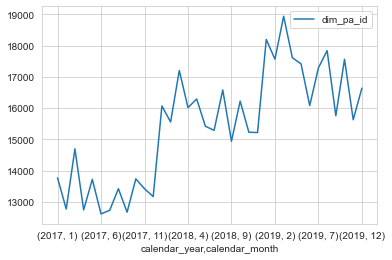

In [106]:
        df3 = df[['dim_pa_id','calendar_year','calendar_month']]
        df4 = df3.groupby(['calendar_year','calendar_month']).count()
        df4.plot()

#### Time Series Analysis Using XGBOOST

In [107]:
df4.head()

dim_pa_id
calendar_year calendar_month           
2017          1                   13766
              2                   12769
              3                   14694
              4                   12742
              5                   13717

In [108]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (2017, 1) to (2019, 12)
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   dim_pa_id  36 non-null     int64
dtypes: int64(1)
memory usage: 605.0 bytes


In [109]:
PA_Volume_M = []
for i in range(len(df4['dim_pa_id'])):
    PA_Volume_M.append(df4['dim_pa_id'].iloc[i])
PA_Volume_M

[13766,
 12769,
 14694,
 12742,
 13717,
 12613,
 12730,
 13419,
 12668,
 13734,
 13418,
 13168,
 16066,
 15554,
 17201,
 16014,
 16290,
 15419,
 15286,
 16579,
 14937,
 16222,
 15226,
 15217,
 18195,
 17563,
 18937,
 17611,
 17413,
 16080,
 17286,
 17837,
 15756,
 17560,
 15626,
 16638]

In [110]:
df_m = pd.DataFrame({"PA_Volume_M": PA_Volume_M})
df_m.head()

,PA_Volume_M
0,13766
1,12769
2,14694
3,12742
4,13717


In [111]:
def PA_Volume_M_MAX_Lag(Max_Lag: int):
    d = np.zeros((len(PA_Volume_M),Max_Lag))
    for j in range(Max_Lag):
        for i in range(len(PA_Volume_M)):
            if i<=j:
                d[i,j] = 0
            else:
                d[i,j] = PA_Volume_M[i-(j+1)]
    return d

In [112]:
def PA_Dataframe(Max_Lag: int):
    for i in range(Max_Lag):
        name = 'Lag' + str((i+1))
        df_m[name] = PA_Volume_M_MAX_Lag(Max_Lag)[:,i]
    return df_m

In [113]:
df_m = PA_Dataframe(12)
df_m.tail()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12
31,17837,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,16579.0
32,15756,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0
33,17560,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0
34,15626,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0
35,16638,15626.0,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0


In [114]:
X = df_m.iloc[12:,1:]
X_train = X.iloc[0:17,:]
X_test = X.iloc[18:,:]
Y = df_m.iloc[12:,0]
y_train = Y.iloc[0:17]
y_test = Y.iloc[18:]

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
from xgboost import XGBRegressor
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse')

[0]	validation_0-rmse:16338.94043	validation_1-rmse:16649.88086
[1]	validation_0-rmse:16185.38672	validation_1-rmse:16496.15039
[2]	validation_0-rmse:16033.29394	validation_1-rmse:16343.87891
[3]	validation_0-rmse:15882.64356	validation_1-rmse:16193.04785
[4]	validation_0-rmse:15733.42285	validation_1-rmse:16043.64551
[5]	validation_0-rmse:15585.61914	validation_1-rmse:15895.65820
[6]	validation_0-rmse:15439.21973	validation_1-rmse:15749.07227
[7]	validation_0-rmse:15294.20996	validation_1-rmse:15603.87500
[8]	validation_0-rmse:15150.57715	validation_1-rmse:15460.05273
[9]	validation_0-rmse:15008.30762	validation_1-rmse:15317.59277
[10]	validation_0-rmse:14867.39160	validation_1-rmse:15176.48242
[11]	validation_0-rmse:14727.81250	validation_1-rmse:15036.70801
[12]	validation_0-rmse:14589.56152	validation_1-rmse:14898.25977
[13]	validation_0-rmse:14452.62305	validation_1-rmse:14761.12207
[14]	validation_0-rmse:14316.98633	validation_1-rmse:14625.28418
[15]	validation_0-rmse:14182.63769	

[129]	validation_0-rmse:4926.87695	validation_1-rmse:5192.04492
[130]	validation_0-rmse:4882.86719	validation_1-rmse:5147.40869
[131]	validation_0-rmse:4839.29688	validation_1-rmse:5103.20508
[132]	validation_0-rmse:4796.16016	validation_1-rmse:5059.42920
[133]	validation_0-rmse:4753.45410	validation_1-rmse:5016.07861
[134]	validation_0-rmse:4711.17432	validation_1-rmse:4973.14795
[135]	validation_0-rmse:4669.31787	validation_1-rmse:4930.63477
[136]	validation_0-rmse:4627.87988	validation_1-rmse:4888.53369
[137]	validation_0-rmse:4586.85791	validation_1-rmse:4846.84131
[138]	validation_0-rmse:4546.24658	validation_1-rmse:4805.55420
[139]	validation_0-rmse:4506.04346	validation_1-rmse:4764.66846
[140]	validation_0-rmse:4466.24414	validation_1-rmse:4724.18066
[141]	validation_0-rmse:4426.84570	validation_1-rmse:4684.08691
[142]	validation_0-rmse:4387.84326	validation_1-rmse:4644.38281
[143]	validation_0-rmse:4349.23486	validation_1-rmse:4605.06592
[144]	validation_0-rmse:4311.01611	valid

[258]	validation_0-rmse:1627.03272	validation_1-rmse:1395.25879
[259]	validation_0-rmse:1613.74805	validation_1-rmse:1382.16553
[260]	validation_0-rmse:1600.58106	validation_1-rmse:1367.91370
[261]	validation_0-rmse:1587.53711	validation_1-rmse:1353.87756
[262]	validation_0-rmse:1574.61462	validation_1-rmse:1340.05591
[263]	validation_0-rmse:1561.81213	validation_1-rmse:1326.44861
[264]	validation_0-rmse:1549.13086	validation_1-rmse:1314.31702
[265]	validation_0-rmse:1536.56274	validation_1-rmse:1301.11609
[266]	validation_0-rmse:1524.11182	validation_1-rmse:1288.12793
[267]	validation_0-rmse:1511.77759	validation_1-rmse:1275.35205
[268]	validation_0-rmse:1499.55872	validation_1-rmse:1262.78760
[269]	validation_0-rmse:1487.45666	validation_1-rmse:1251.60437
[270]	validation_0-rmse:1475.46204	validation_1-rmse:1239.44153
[271]	validation_0-rmse:1463.56824	validation_1-rmse:1226.80566
[272]	validation_0-rmse:1451.78455	validation_1-rmse:1214.34607
[273]	validation_0-rmse:1440.10986	valid

[389]	validation_0-rmse:603.15149	validation_1-rmse:887.60693
[390]	validation_0-rmse:598.92578	validation_1-rmse:890.59174
[391]	validation_0-rmse:594.73578	validation_1-rmse:893.59235
[392]	validation_0-rmse:590.58075	validation_1-rmse:896.60846
[393]	validation_0-rmse:586.47485	validation_1-rmse:899.45099
[394]	validation_0-rmse:582.37427	validation_1-rmse:902.09729
[395]	validation_0-rmse:578.32013	validation_1-rmse:905.14941
[396]	validation_0-rmse:574.28656	validation_1-rmse:907.82568
[397]	validation_0-rmse:570.29901	validation_1-rmse:910.89929
[398]	validation_0-rmse:566.36011	validation_1-rmse:913.78705
[399]	validation_0-rmse:562.42432	validation_1-rmse:916.49823
[400]	validation_0-rmse:558.53400	validation_1-rmse:919.59613
[401]	validation_0-rmse:554.66345	validation_1-rmse:922.32874
[402]	validation_0-rmse:550.85425	validation_1-rmse:925.24042
[403]	validation_0-rmse:547.05902	validation_1-rmse:927.92206
[404]	validation_0-rmse:543.29492	validation_1-rmse:931.04553
[405]	va

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
predictions = reg.predict(X_test)

In [118]:
df_m.head()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12
0,13766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12769,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,14694,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12742,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13717,12742.0,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
month_list = []
for i in range(36):
    month_list.append((i+1))
df_m['month'] = month_list

In [120]:
df_m.head()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12,month
0,13766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,12769,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,14694,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,12742,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,13717,12742.0,14694.0,12769.0,13766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [121]:
pred_list = []
for i in range(36):
    if i<30:
        pred_list.append(0)
    else:
        pred_list.append(predictions[(i-30)])

In [122]:
df_m['predictions'] = pred_list

In [123]:
df_m.tail()

,PA_Volume_M,Lag1,Lag2,Lag3,Lag4,Lag5,Lag6,Lag7,Lag8,Lag9,Lag10,Lag11,Lag12,month,predictions
31,17837,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,16579.0,32,17878.798828
32,15756,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,14937.0,33,16572.001953
33,17560,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,16222.0,34,16999.347656
34,15626,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,15226.0,35,17878.798828
35,16638,15626.0,17560.0,15756.0,17837.0,17286.0,16080.0,17413.0,17611.0,18937.0,17563.0,18195.0,15217.0,36,17872.148438


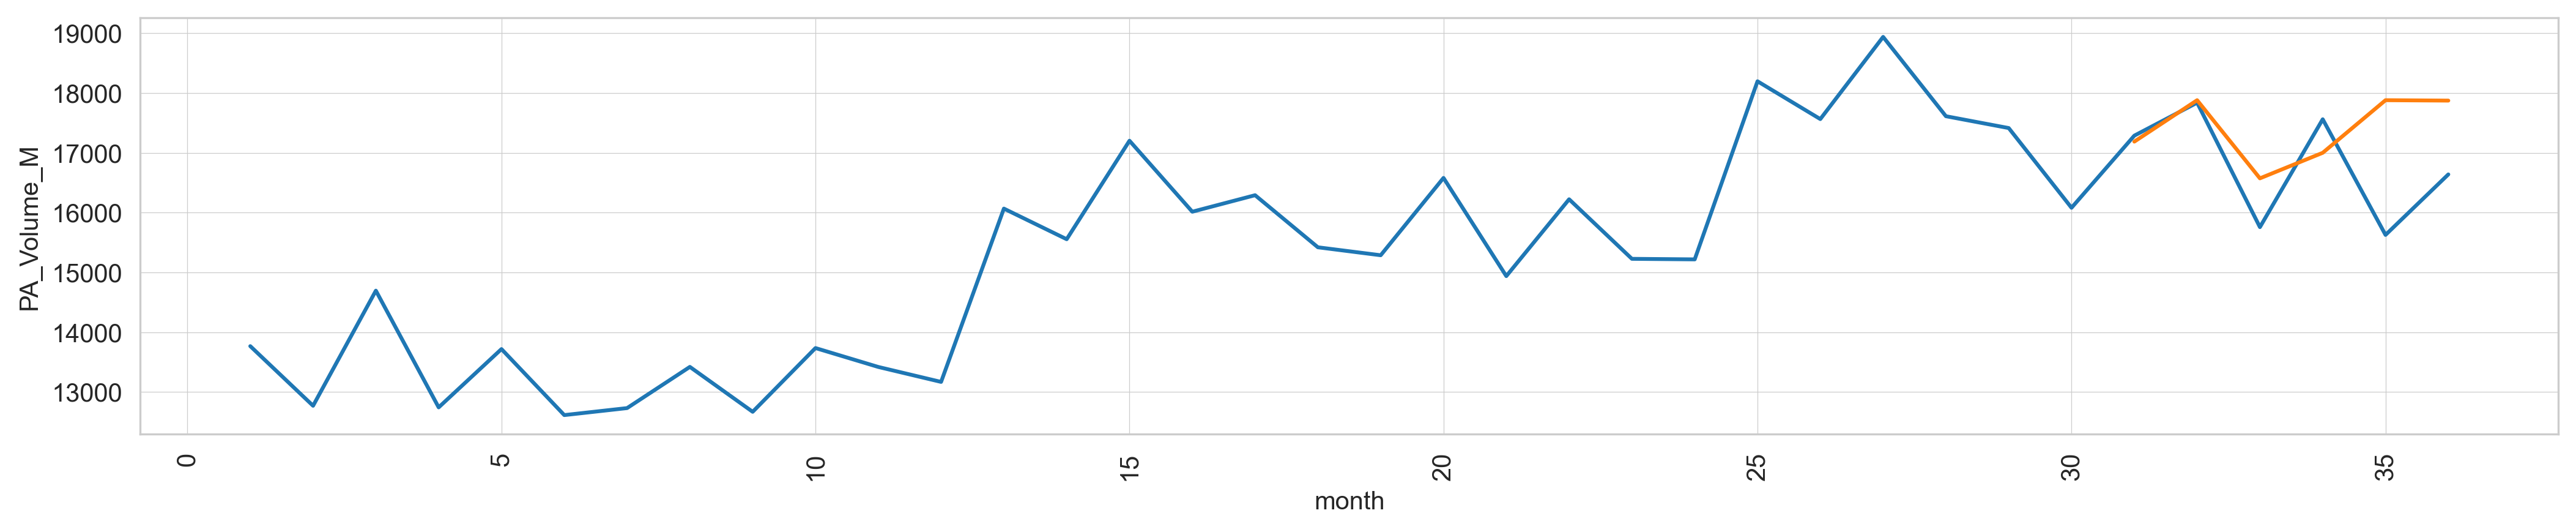

In [124]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_m, x='month', y='PA_Volume_M')
sns.lineplot(data=df_m.tail(6), x='month', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

#### Performance Measures

In [125]:
y_true = df_m.tail(6).PA_Volume_M.values

In [126]:
y_pred = df_m.tail(6).predictions.values

In [127]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)


-0.7320958143576262

In [128]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_true, y_pred))

834.2109375


In [129]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(y_true, y_pred))

688.3271484375


In [130]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred, y_true))

1265022.5618184407


In [131]:
df10 = df_pa_ts[['dim_pa_id','date_val']]
df11 = df10.groupby(['date_val']).count()
df11.head()
df11['date'] = df10.date_val.unique()
df12 = pd.DataFrame({"PA_Volume_D": df11['dim_pa_id'],"date": df11['date']})
len(df12)

1095

In [132]:
df12.head()

,PA_Volume_D,date
date_val,,
2017-01-01,94,2017-01-01
2017-01-02,437,2017-01-02
2017-01-03,614,2017-01-03
2017-01-04,591,2017-01-04
2017-01-05,598,2017-01-05


#### TBATS Model

In [144]:
import pandas as pd
y = df12['PA_Volume_D'].values.tolist()
y_to_train = y[:(len(y)-365)]
y_to_test = y[(len(y)-365):] # last year for testing

In [145]:
pip install --user tbats

Note: you may need to restart the kernel to use updated packages.


In [146]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(y_to_train)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=365)

KeyboardInterrupt: 

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_m, x='month', y='PA_Volume_M')
sns.lineplot(data=df_m.tail(6), x='month', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
y_forecast[0:5]

In [ ]:
y[0:5]

In [ ]:
len(df12)

In [ ]:
days = []
for i in range(len(df12)):
    days.append(i)

In [ ]:
y_f = []
for i in range(len(df12)-len(y_forecast)):
    y_f.append(i)
len(y_f)
y_f.extend(y_forecast)
len(y_f)

In [ ]:
df_d = pd.DataFrame({"Days": days, "PA_Volume_D": y, "predictions": y_f})

In [ ]:
df_d.head()

In [ ]:
plt.rcParams.update({'figure.figsize': (17, 3), 'figure.dpi':300})
fig, ax = plt.subplots()
sns.lineplot(data=df_d, x='Days', y='PA_Volume_D')
sns.lineplot(data=df_d.tail(len(y_forecast)), x='Days', y='predictions')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
y_true = df_d.tail(len(y_forecast)).PA_Volume_D.values
y_pred = df_d.tail(len(y_forecast)).predictions.values

In [ ]:
print(r2_score(y_true,y_pred))

In [ ]:
print(mean_absolute_error(y_true,y_pred))

In [ ]:
print(median_absolute_error(y_true,y_pred))

In [ ]:
print(mean_squared_error(y_true,y_pred))

#### SARIMA Model

In [247]:
X_train = []
for i in range(int(0.8*len(df4))):
    X_train.append(df4.iloc[i][0])
len(X_train)

28

In [248]:
X_test = []
for i in range(int(0.8*len(df4)),len(df4)):
    X_test.append(df4.iloc[i][0])
len(X_test)

8

In [219]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
# contrived dataset
data = X_train
# fit model
model = SARIMAX(data, order=(12, 0, 0), seasonal_order=(0, 0, 0, 12))
model_fit = model.fit(disp=False)

C:\Users\xushu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\xushu\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [249]:
a =model_fit.forecast(len(X_test))
l2 = []
for i in range(len(X_train)):
    l2.append(0)
for i in range(len(X_test)):
    l2.append(a[i])
print(type(l2))

<class 'list'>


In [250]:
months = []
for i in range(len(df4)):
    months.append(i)

In [251]:
df_result = pd.DataFrame({"month": months,
                         "prediction": l2})

In [252]:
l1 = []
for i in range(len(X_train)):
    l1.append(X_train[i])
for i in range(len(X_test)):
    l1.append(X_test[i])
print(l1)

[13766, 12769, 14694, 12742, 13717, 12613, 12730, 13419, 12668, 13734, 13418, 13168, 16066, 15554, 17201, 16014, 16290, 15419, 15286, 16579, 14937, 16222, 15226, 15217, 18195, 17563, 18937, 17611, 17413, 16080, 17286, 17837, 15756, 17560, 15626, 16638]


In [253]:
df_result['test'] = l1

In [254]:
df_result.tail(9)

,month,prediction,test
27,27,0.000000,17611
28,28,16974.030471,17413
29,29,17019.581207,16080
30,30,16577.629256,17286
31,31,18142.584398,17837
32,32,16123.075698,15756
33,33,16501.798003,17560
34,34,16426.411170,15626
35,35,15889.120968,16638


In [255]:
l3 = []
for i in range(len(X_train)):
    l3.append(X_train[i])
for i in range(len(X_test)):
    l3.append(0)
print(l3)

[13766, 12769, 14694, 12742, 13717, 12613, 12730, 13419, 12668, 13734, 13418, 13168, 16066, 15554, 17201, 16014, 16290, 15419, 15286, 16579, 14937, 16222, 15226, 15217, 18195, 17563, 18937, 17611, 0, 0, 0, 0, 0, 0, 0, 0]


In [256]:
l4 = []
for i in range(len(X_train)):
    l4.append(model_fit.fittedvalues[i])
for i in range(len(X_test)):
    l4.append(0)
print(l4)
len(l4)

[0.0, 13710.04537543371, 13401.151992677165, 13385.4813380924, 13956.979955668741, 13283.283137394024, 12244.463457206779, 13822.946582680874, 12411.540974309568, 13901.30383835956, 12664.06110692762, 13355.76982546354, 14514.009014532749, 14349.786065638189, 17726.431615647234, 16208.969557121894, 15568.403464294586, 15636.887894318665, 15588.458338883778, 16190.256261006696, 14821.917776710063, 15520.603607407964, 16158.125170567915, 15044.580762150297, 16713.385946963175, 17202.812047390773, 19518.694731984153, 17688.641049778307, 0, 0, 0, 0, 0, 0, 0, 0]


36

In [257]:
df_result['train'] = l3
df_result['fit'] = l4

In [258]:
df_result.tail(10)

,month,prediction,test,train,fit
26,26,0.000000,18937,18937,19518.694732
27,27,0.000000,17611,17611,17688.641050
28,28,16974.030471,17413,0,0.000000
29,29,17019.581207,16080,0,0.000000
30,30,16577.629256,17286,0,0.000000
31,31,18142.584398,17837,0,0.000000
32,32,16123.075698,15756,0,0.000000
33,33,16501.798003,17560,0,0.000000
34,34,16426.411170,15626,0,0.000000
35,35,15889.120968,16638,0,0.000000


In [260]:
df_result2 = df_result.iloc[1:,:]

In [262]:
df_result3 = df_result2[['month','test','train','fit']]

In [272]:
df_result2.reset_index(drop=True)

,month,prediction,test,train,fit
0,1,0.000000,12769,12769,13710.045375
1,2,0.000000,14694,14694,13401.151993
2,3,0.000000,12742,12742,13385.481338
3,4,0.000000,13717,13717,13956.979956
4,5,0.000000,12613,12613,13283.283137
5,6,0.000000,12730,12730,12244.463457
6,7,0.000000,13419,13419,13822.946583
7,8,0.000000,12668,12668,12411.540974
8,9,0.000000,13734,13734,13901.303838
9,10,0.000000,13418,13418,12664.061107


In [275]:
df_result2['fit'].iloc[0]

13710.04537543371

In [282]:
l5=[]
for i in range(27):
    l5.append(df_result2['fit'].iloc[i])
for i in range(27,35):
    l5.append(df_result2['prediction'].iloc[i])
print(l5)
len(l5)
len(df_result2)

[13710.04537543371, 13401.151992677165, 13385.4813380924, 13956.979955668741, 13283.283137394024, 12244.463457206779, 13822.946582680874, 12411.540974309568, 13901.30383835956, 12664.06110692762, 13355.76982546354, 14514.009014532749, 14349.786065638189, 17726.431615647234, 16208.969557121894, 15568.403464294586, 15636.887894318665, 15588.458338883778, 16190.256261006696, 14821.917776710063, 15520.603607407964, 16158.125170567915, 15044.580762150297, 16713.385946963175, 17202.812047390773, 19518.694731984153, 17688.641049778307, 16974.03047083297, 17019.581206776842, 16577.62925619305, 18142.584398099174, 16123.075697559936, 16501.798003448115, 16426.41117000173, 15889.12096766434]


35

In [283]:
df_result3 = df_result2[['month','test','train','fit']]
df_result3['prediction'] = l5
df_result3

,month,test,train,fit,prediction
1,1,12769,12769,13710.045375,13710.045375
2,2,14694,14694,13401.151993,13401.151993
3,3,12742,12742,13385.481338,13385.481338
4,4,13717,13717,13956.979956,13956.979956
5,5,12613,12613,13283.283137,13283.283137
6,6,12730,12730,12244.463457,12244.463457
7,7,13419,13419,13822.946583,13822.946583
8,8,12668,12668,12411.540974,12411.540974
9,9,13734,13734,13901.303838,13901.303838
10,10,13418,13418,12664.061107,12664.061107


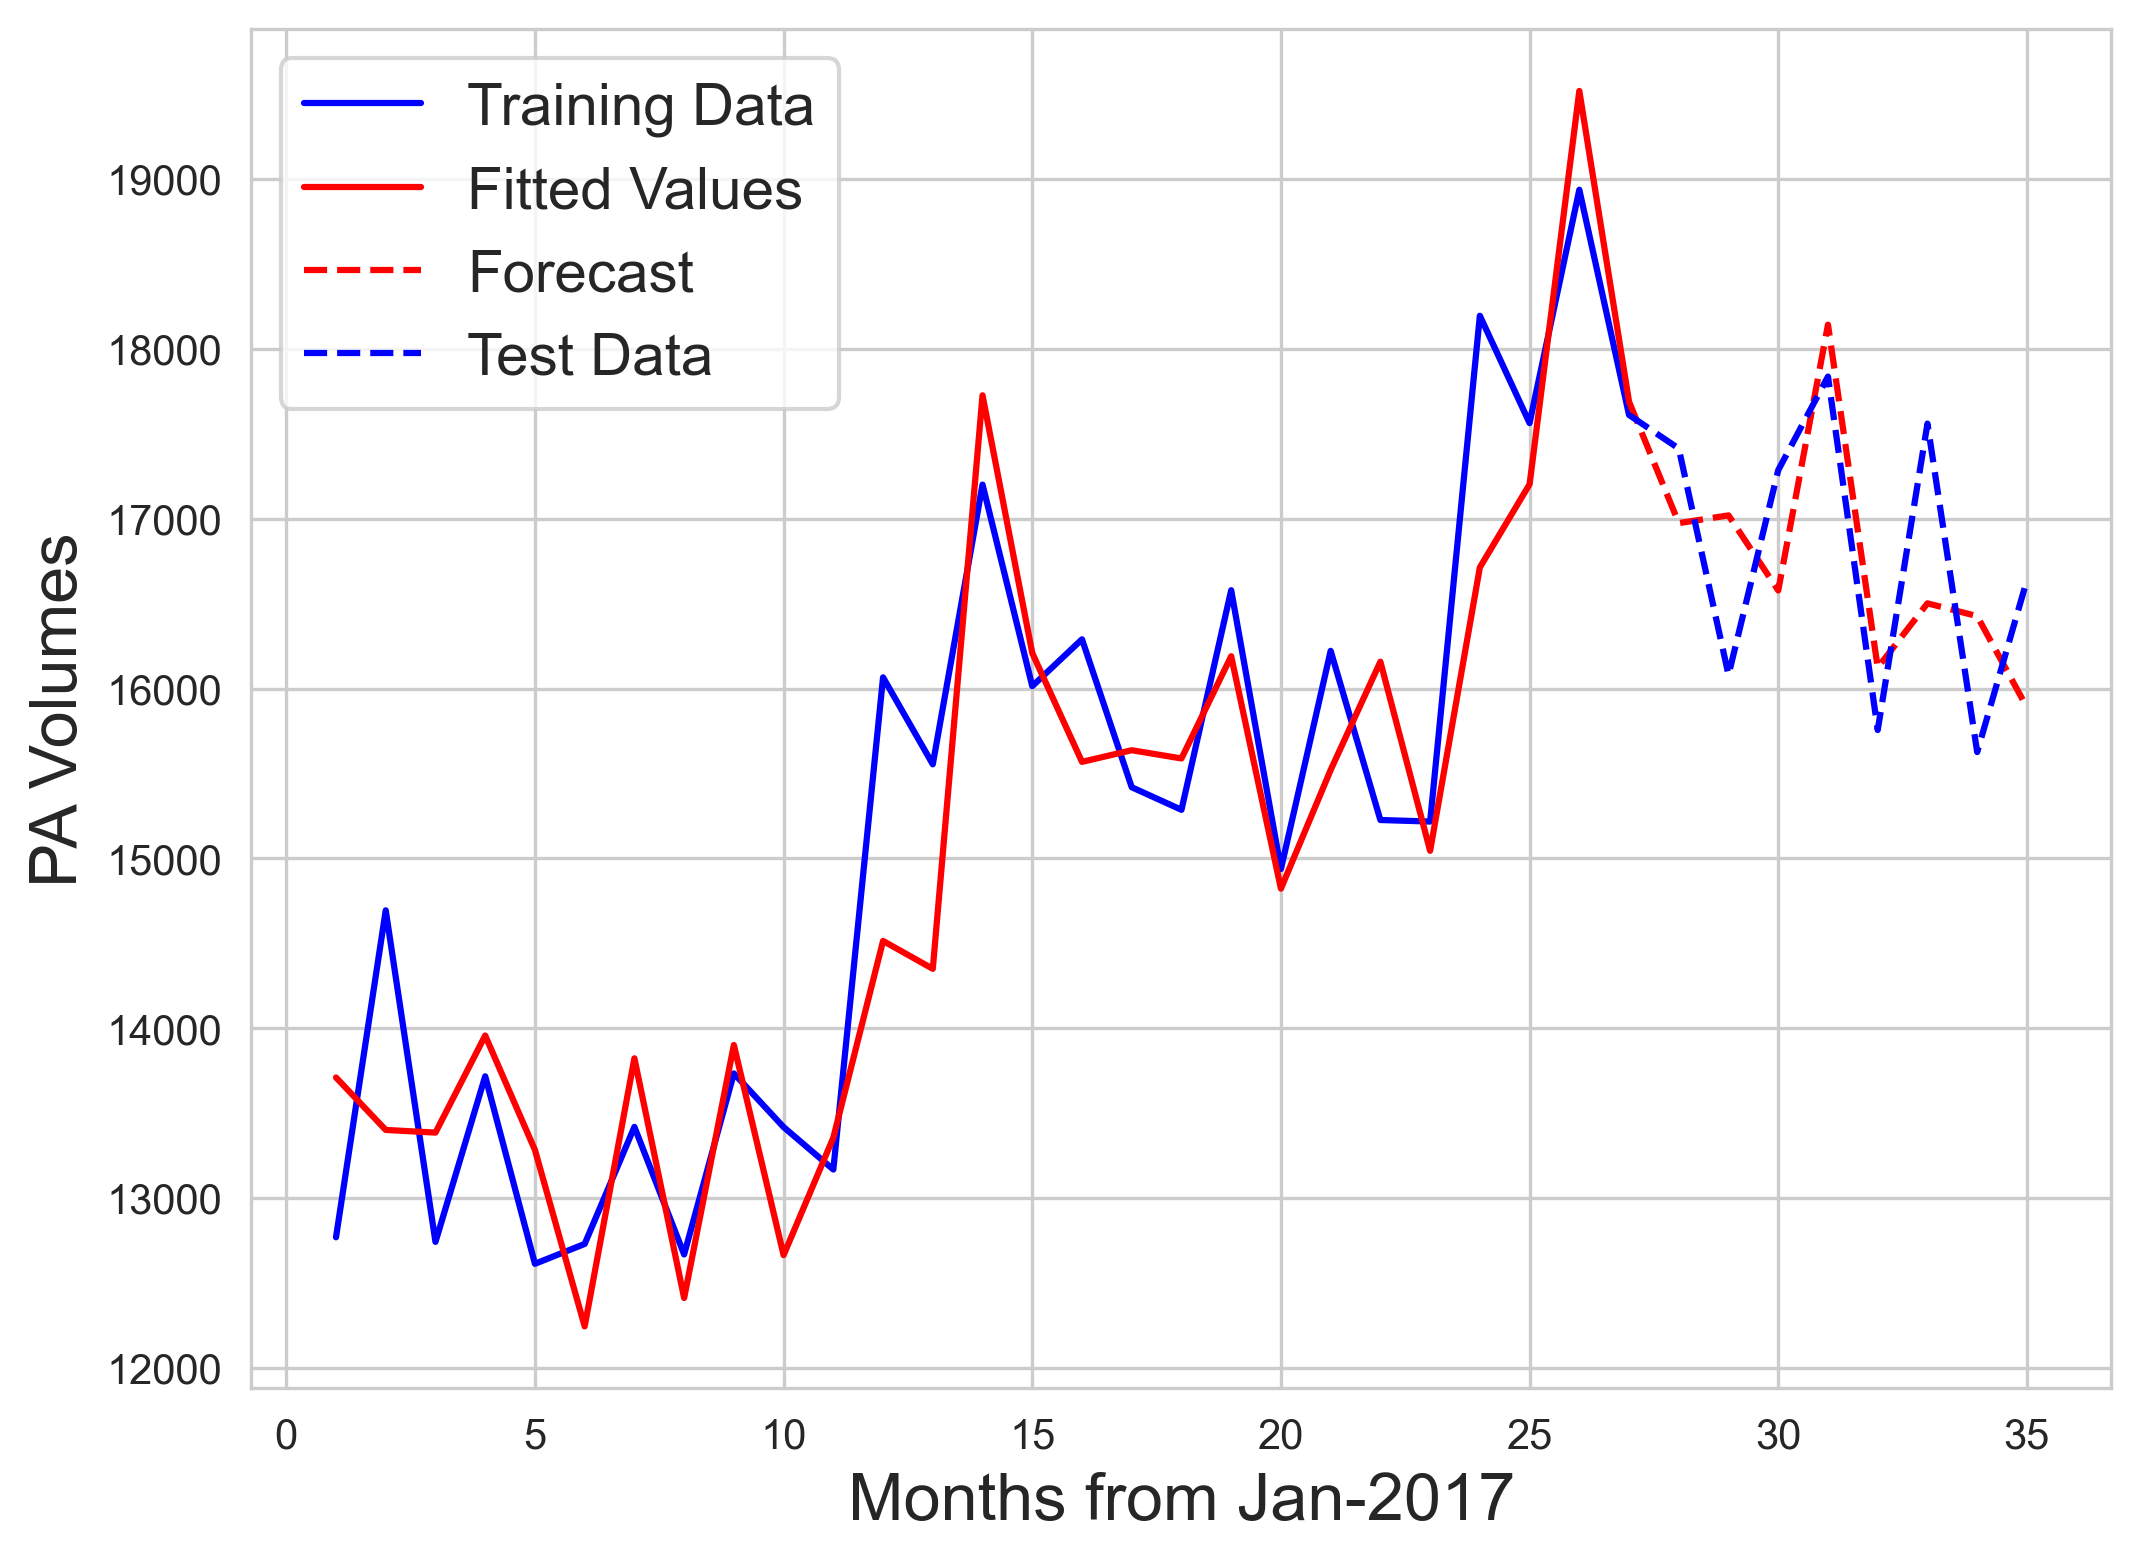

In [285]:
plt.figure(figsize=(8,6))

# plot the training data
plt.plot(df_result3.head(27)['train'],'b',
            label = "Training Data")

# plot the fit
plt.plot(df_result3.head(27)['fit'],'r-',
            label = "Fitted Values")

# plot the forecast
plt.plot(df_result3.tail(9)['prediction'],'r--',
            label = "Forecast")

plt.plot(df_result3.tail(9)['test'],'b--',
            label = "Test Data")

plt.legend(fontsize=14)

plt.xlabel("Months from Jan-2017", fontsize=16)
plt.ylabel("PA Volumes", fontsize=16)

plt.show()

In [138]:
y_true = X_test
y_pred = model_fit.forecast(len(X_test))

In [139]:
print(r2_score(y_true,y_pred))

0.21733086179127947


In [140]:
print(mean_squared_error(y_true,y_pred))

515836.48826120514


In [141]:
print(mean_absolute_error(y_true,y_pred))

670.884221787401


In [142]:
print(median_absolute_error(y_true,y_pred))

728.6248880713056
